In [43]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, BasicTickFormatter, HoverTool
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
output_notebook()

Loading BokehJS ...

2020-01-31


[]

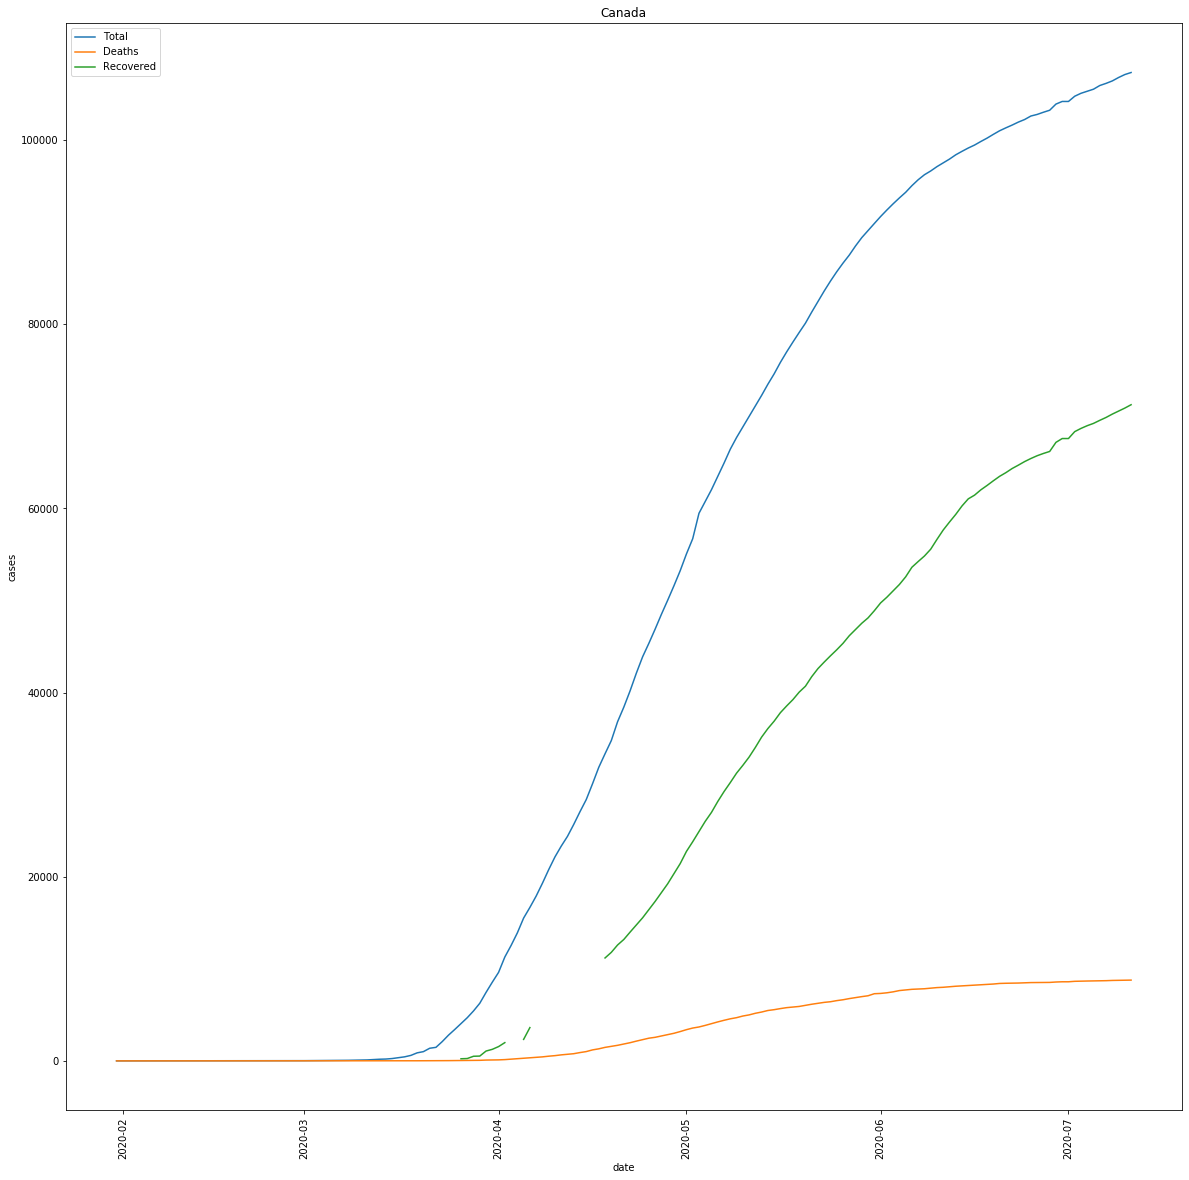

In [89]:
# https://health-infobase.canada.ca/src/data/covidLive/covid19.csv
csv_url = "https://health-infobase.canada.ca/src/data/covidLive/covid19.csv"

df = pd.read_csv(csv_url)

#canada = df[df['prname'] == 'Canada']
#canada['datetime'] = pd.to_datetime(canada['date'],dayfirst = True)
#canada['date'] = pd.to_datetime(canada['date'],dayfirst = True)

#get individual province data frames
df['dates'] = pd.to_datetime(df['date'], dayfirst = True)
df['YMD'] = df['dates'].dt.date
print(df['YMD'].iloc[1])

data_split = [i for _, i in df.groupby('prname')]

#Canada
ax1 = plt.subplot()
ax1.plot(data_split[2]['YMD'], data_split[2]['numtotal'], label = 'Total')
ax1.plot(data_split[2]['YMD'], data_split[2]['numdeaths'], label = 'Deaths')
ax1.plot(data_split[2]['YMD'], data_split[2]['numrecover'], label = 'Recovered')
ax1.legend()
ax1.set_title(data_split[2]['prname'].iloc[0])
ax1.set_xlabel('date')
ax1.set_ylabel('cases')
plt.xticks(rotation=90)
plt.plot()


In [96]:
p = figure(plot_width = 600, plot_height = 600, 
           title = 'COVID-19 Cases, Recoveries and Deaths',
           x_axis_label = 'Date', y_axis_label = 'Cases',
           x_axis_type='datetime')

source = ColumnDataSource(data=data_split[2])
t = p.line('YMD','numtotal',source = source,color = 'navy', line_width=4, alpha = 0.5, legend_label="Total")
d = p.line('YMD','numdeaths',source = source,color = 'firebrick', line_width=4, alpha = 0.5, legend_label="Deaths")
r = p.line('YMD','numrecover',source = source,color = 'green', line_width=4, alpha = 0.5, legend_label="Recovered")
p.xaxis.major_label_orientation = "vertical"
p.yaxis.formatter = BasicTickFormatter(use_scientific=False)
p.legend.location = "top_left"
p.legend.click_policy = "hide"

hover = HoverTool(mode = 'mouse')
hover.tooltips = [('Date', '@YMD{%F}'), ('Cases', '$y{use_scientific = False}')]
hover.formatters = { "@YMD": "datetime"}
p.add_tools(hover)



output_file("interactive_legend.html", title="interactive_legend.py example")
show(p)